<a href="https://colab.research.google.com/github/AndresUrregoAngel/CBB/blob/master/AI/Intro_AI/intra/IntraCaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**College Bois de Bologne**

**Student: Andres Urrego Angel**

**Course: ML Introduction**



**T**his intra project will perform two different ML prediction model using a public dataset available within the library **Sklearn** for python. The dataset picked is called *California Housing Dataset*, is composed by 8 predictors and a target variable with a description as below:

**Attribute Information:**
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

**Target:**

* median house value for California districts.

Let's start reading the dataset and print a sample of data. The dataset is coming broke down into arrays for the predictors and target, therefore , it's required to points into the specific data tag to show up this information as the code follows:



In [25]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing()
print("The predictors description: ",df['feature_names'])
print("Sample of data for the predictors (8 variables) : ",df['data'][0])
print("Quick glance on the target look: ",df['target'][0])
print("Dataset's shape: ",df['data'].shape)

The predictors description:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Sample of data for the predictors (8 variables) :  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
Quick glance on the target look:  4.526
Dataset's shape:  (20640, 8)


Once identified the dtaset look, the nest step is break this data into two separate datasets. The first which from now on is going to be called **X** will store the data in regards all the predictors used within the model. The second one identify as **Y** will contain exclusively our target variable to predict the median house value of California districts.

In [0]:
X = df['data']
Y = df['target']

Before move forward and jump into the model , it's a very good practice try visualize at least few variables behevior along with the target to indentify patterns or either to idetify the weight of these predictors against the target. Here below is plot the *Population* and *HouseAge* versus *Target*:


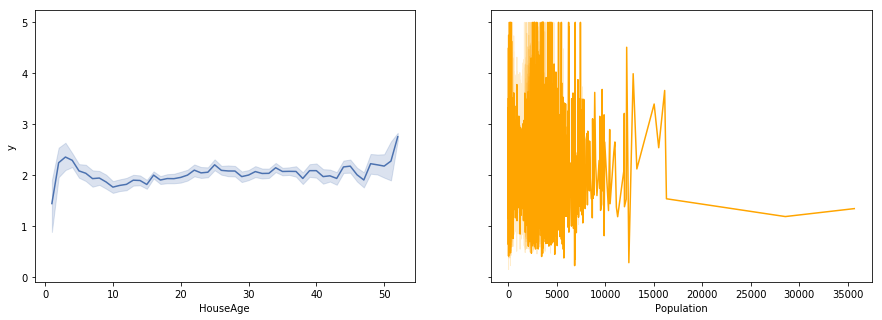

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dfg = pd.DataFrame({'HouseAge':df['data'][:,1],
                    'Population':df['data'][:,4],
                    'y':df['target'][:]})


f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.set_palette("deep")
sns.lineplot(x='HouseAge',y='y',data=dfg,ax=ax1)
sns.lineplot(x='Population',y='y',data=dfg,ax=ax2,color="orange")
plt.show()


**Standarization (Scaler) and Optimization (PCA)**

In order to deploy a more efficient ML model, is highly used a technique that will remove the mean and the reduce the variace amog the predictors, this will remove the non necessary data that could jeopardize the final performance of the model. Hence, this technique is applied below by the **StandardScaler**

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size=0.33,random_state = 33)


# Apply the scaler
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1,1))
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1,1))

X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1,1))

print("The dimensions for X train before the PCA: ",X_train[0])

The dimensions for X train before the PCA:  [ 0.73072186  0.4175369  -0.23144758  0.16663896 -0.93911102 -0.09385703
 -0.94442691  0.7963441 ]


In addition with the input preparation before feed our model, there is another very meaningful approach called **PCA** that will reduce the number of dimensions within our predictors making therefore the learning process of the model very efficient. In this case we will pass from 8 dimensions to 4.

In [89]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pc_train = pca.fit_transform(X_train)
pc_test = pca.fit_transform(X_test)
X_train = np.array(pc_train)
X_test = np.array(pc_test)

print("The dimensions for X train after the PCA: ",X_train[0])

The dimensions for X train after the PCA:  [-0.77866617  0.6132748  -1.07424805 -0.89231149]


**Linear regression model**

In [97]:
from sklearn import datasets, linear_model

#Build model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)

# Predictions for lr
pred_lr_y = model_lr.predict(X_test)

pred_lr_y.shape

(6812, 1)

**Classification Decision Tree**

In [0]:
from sklearn import tree

#Build model
# model_tree = tree.DecisionTreeClassifier(max_depth=2)
model_tree = tree.DecisionTreeRegressor(random_state=0)
model_tree.fit(X_train,y_train)

#Predictions for classifier
pred_tree_y = model_tree.predict(X_test)

Now is time to validate the performance of each model and in that way perhaps stablish wich one was train better or likely could be a better option to face this prediction workshop.

Internally each model behaves fairly different expanding a gap in terms of score along the two models. The library **Sklearn** counts with a *metrics* module which allow face the model against accurate measures to conclude the performance.


**Performance Linear Regression model:**


Linear model coeficient:  [[ 0.72665467  0.10016661 -0.25074942  0.29500214 -0.00771712 -0.03566995
  -0.78685663 -0.76275817]]
MSE for the linear model:  [0.39371863]


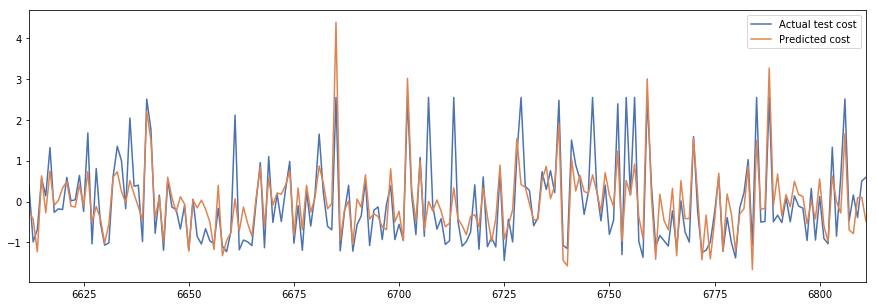

In [104]:
from sklearn import metrics

print("Linear model coeficient: ",model_lr.coef_)
print("MSE for the linear model: ",metrics.mean_squared_error(y_test,pred_lr_y ,multioutput='raw_values'))  #Best score 0.0 wich means no error

y_testg = [row[0] for row in y_test]
predg_lr_y = [row[0] for row in pred_lr_y]

resultDF=pd.DataFrame({'Actual test cost':y_testg, 'Predicted cost':predg_lr_y})  
resultDF.sort_index()[-200:].plot(figsize=(15,5))


**Performance Decision Tree**

MSE for the linear model:  [0.40652837]


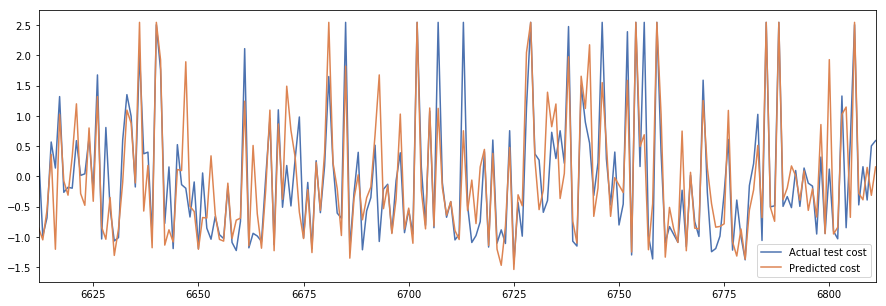

In [105]:

print("MSE for the linear model: ",metrics.mean_squared_error(y_test,pred_tree_y ,multioutput='raw_values'))  #Best score 0.0 wich means no error


resultDF=pd.DataFrame({'Actual test cost':y_testg, 'Predicted cost':pred_tree_y})  
resultDF.sort_index()[-200:].plot(figsize=(15,5))


**Conclusions**